This is the projected cooling algorithm for the IBM bootcamp on Oct. 18-19th 2019. Group members: Joey Bonitati, Ilaria Siloi, and Jacob Watkins

Import statements

In [1]:
import numpy as np
from qiskit import IBMQ, ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

Define some useful gates 

In [2]:
def N(qc, q1, q2, alpha, beta, gamma):
    qc.rz(np.pi/2,q2)
    qc.cx(q2,q1)
    qc.rz(-np.pi/2,q1)
    qc.ry(np.pi/2- 2*alpha,q2)
    qc.cx(q1,q2)
    qc.ry(2*beta-np.pi/2,q2)
    qc.cx(q2,q1)
    qc.rz(-np.pi/2,q1)

Construct the quantum circuit

In [13]:
#parameters
L = 15
n_qubit = 2*L+1
Lt = 1.
nt = 20
deltat = Lt/nt
V0 = -1000.

qr = QuantumRegister(n_qubit,'q')
cr = ClassicalRegister(n_qubit,'c')

qc = QuantumCircuit(qr,cr)

#initialize state
qc.x(L)
qc.barrier()

#perform time evolution
for step in range(0,nt):
        #Potential
        qc.rz(2*deltat*V0, L)
        qc.barrier()
        
        #Diagonal Kinetic
        qc.rz(2*deltat,np.arange(0,n_qubit))
        qc.barrier()
        
        #Even kinetic
        for i in range(0,n_qubit-1,2):
            N(qc,i,i+1,deltat/2,deltat/2,0)
        qc.barrier()
        
        #Odd kinetic
        for i in range(1,n_qubit,2):
            N(qc,i,i+1,deltat/2,deltat/2,0) 
qc.barrier()
print(qc.depth())
print(qc.num_connected_components(unitary_only=True)) # 1 means fully entangled
#print(qc)

321
1
               ░              ░ ┌─────────┐ ░             ┌───┐┌───────────┐ »
 q_0: |0>──────░──────────────░─┤ Rz(0.1) ├─░─────────────┤ X ├┤ Rz(-pi/2) ├─»
               ░              ░ ├─────────┤ ░ ┌──────────┐└─┬─┘├───────────┴┐»
 q_1: |0>──────░──────────────░─┤ Rz(0.1) ├─░─┤ Rz(pi/2) ├──■──┤ Ry(1.5208) ├»
               ░              ░ ├─────────┤ ░ └──────────┘┌───┐├───────────┬┘»
 q_2: |0>──────░──────────────░─┤ Rz(0.1) ├─░─────────────┤ X ├┤ Rz(-pi/2) ├─»
               ░              ░ ├─────────┤ ░ ┌──────────┐└─┬─┘├───────────┴┐»
 q_3: |0>──────░──────────────░─┤ Rz(0.1) ├─░─┤ Rz(pi/2) ├──■──┤ Ry(1.5208) ├»
               ░              ░ ├─────────┤ ░ └──────────┘┌───┐├───────────┬┘»
 q_4: |0>──────░──────────────░─┤ Rz(0.1) ├─░─────────────┤ X ├┤ Rz(-pi/2) ├─»
               ░              ░ ├─────────┤ ░ ┌──────────┐└─┬─┘├───────────┴┐»
 q_5: |0>──────░──────────────░─┤ Rz(0.1) ├─░─┤ Rz(pi/2) ├──■──┤ Ry(1.5208) ├»
               ░              ░ ├─────────┤ ░ 

Run on local qasm simulator.

In [15]:
from qiskit import BasicAer
backend = BasicAer.get_backend('ibmq_qasm_simulator')

job_sim = execute(qc, backend)
result_sim = job_sim.result()
counts = result_sim.get_counts()
plot_histogram(counts)

QiskitBackendNotFoundError: "The 'ibmq_qasm_simulator' backend is not installed in your system."

Run on actual quantum computer.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


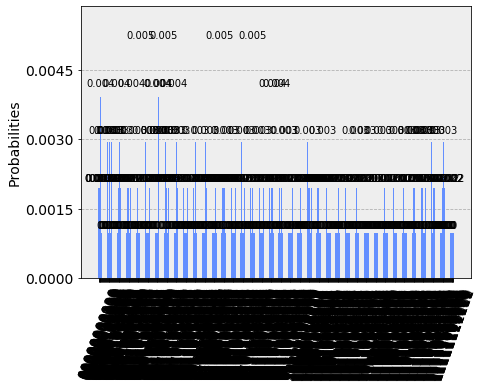

In [18]:
#load credentials and get backend through provider
IBMQ.load_account()
my_provider = IBMQ.get_provider()
backend = my_provider.get_backend('ibmq_16_melbourne')

#execute job and record results
job_sim = execute(qc,backend)
result = job_sim.result()
counts = result.get_counts()
plot_histogram(counts)

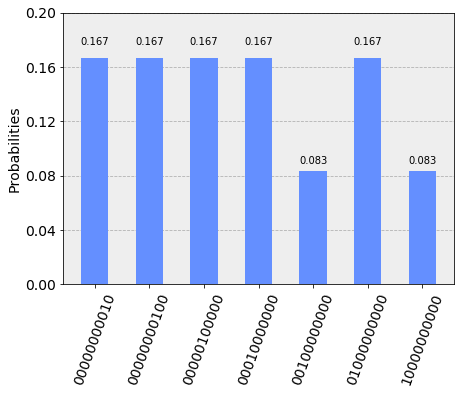

In [19]:
onlyones = {}
for i in counts:
    list = i.split('1')
    if len(list) == 2:
        onlyones[i] = counts[i]
plot_histogram(onlyones)